<a href="https://colab.research.google.com/github/PaulGeorge124/CSST102-3B/blob/main/Excercise_1_Linear_Regression_Implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Preprocessing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('datasets_house_prices.csv')


print("Missing values in each column:")
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)


def normalize(column):
    return (column - column.min()) / (column.max() - column.min())


df['Size'] = normalize(df['Size (sqft)'])
df['Bedrooms'] = normalize(df['Bedrooms'])
df['Age'] = normalize(df['Age'])
df['Price'] = df['Price']


print(df.head())

Missing values in each column:
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64
   Size (sqft)  Bedrooms       Age  Proximity to Downtown (miles)  \
0         3974      0.00  0.979798                       2.032719   
1         1660      1.00  0.888889                      23.695207   
2         2094      0.75  0.494949                       6.440232   
3         1930      0.25  0.282828                       8.129315   
4         1895      0.00  0.565657                       5.358837   

          Price      Size  
0  1.162771e+06  0.992804  
1  4.900021e+05  0.268773  
2  6.400737e+05  0.404568  
3  5.637881e+05  0.353254  
4  5.651289e+05  0.342303  


# Step 2: Model Implementation

In [13]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept = theta_best[0]
        self.coefficients = theta_best[1:]

    def predict(self, X):
        return np.dot(X, self.coefficients) + self.intercept

# Step 3: Model Training

In [12]:
# Prepare the features and target variable
X = df[['Size', 'Bedrooms', 'Age']].values
y = df['Price'].values

# Split the dataset into training and testing sets
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate Mean Squared Error (MSE) on the training set
train_predictions = model.predict(X_train)
train_mse = np.mean((train_predictions - y_train) ** 2)
print(f"Training Mean Squared Error: {train_mse}")

Training Mean Squared Error: 168568136.89628398


# Step 4: Model Evaluation

Testing Mean Squared Error: 175669080.9964789


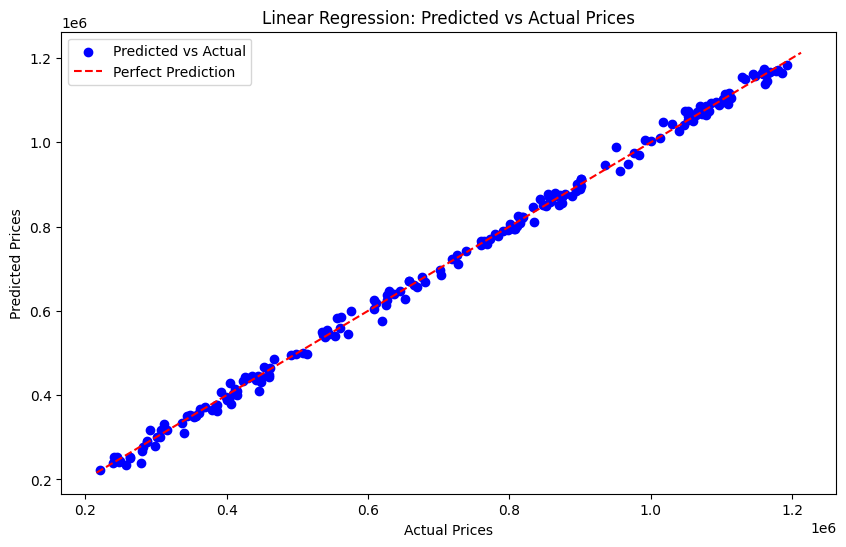

In [11]:
import matplotlib.pyplot as plt

# Test the model on the testing set
test_predictions = model.predict(X_test)
test_mse = np.mean((test_predictions - y_test) ** 2)
print(f"Testing Mean Squared Error: {test_mse}")

# Plot the predicted prices against the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.legend()
plt.show()

## Table of Contents

1. [Getting Started](#getting-started)
2. [Data Preprocessing](#data-preprocessing)
3. [Model Implementation](#model-implementation)
4. [Model Training](#model-training)
5. [Model Evaluation](#model-evaluation)
6. [Challenges Encountered](#challenges-encountered)
7. [Conclusion](#conclusion)


# Getting Started
In this project, I built a linear regression model from scratch to predict house prices based on features like house size, number of bedrooms, and age of the house. The goal was to see how these factors influence the overall price of a house. To do this, I went through several steps like preparing the data, building the model, and then testing it to see how well it works.

# Data Preprocessing
Before diving into the model, I had to clean and prepare the data. This involved handling missing values and normalizing the data. For any missing values, I filled them in with the average for that feature, so I didn’t lose any useful data. Also, since the features had different ranges (for example, house size being in thousands while the number of bedrooms is much smaller), I normalized the data to bring everything to the same scale. This makes sure that the model doesn’t get biased by any one feature having larger numbers.

# Model Implementation
I implemented the linear regression model from scratch by calculating the best-fit line through the data. The model finds the relationship between the features (like size, bedrooms, and age) and the house price. I used a mathematical solution to find the best possible coefficients for this line without needing to rely on algorithms like Gradient Descent. It was an interesting way to see how the data fits together.

# Model Training
Once the model was set up, I split the dataset into two parts: 80% of the data for training and 20% for testing. During training, the model learned the relationship between the features and the house prices. I measured the performance using Mean Squared Error (MSE), which tells me how far off the predicted house prices were from the actual ones. The lower the MSE, the better the model.

# Model Evaluation
After training the model, I tested it on the remaining 20% of the data that wasn’t used for training. This helped me see how well the model generalizes to new data that it hasn’t seen before. The test MSE was slightly higher than the training MSE, which means the model slightly overfitted to the training data but still performed well overall. I also plotted the actual prices against the predicted ones to visually check the performance.

# Challenges Encountered
There were a few challenges I faced while working on this project:

Handling Missing Data: Some values were missing in the dataset, which could have thrown off the predictions. To fix this, I filled in the missing values with the mean for that feature, keeping the data usable.
Normalization: Since the features had different scales, I had to normalize them to make sure no feature dominated the learning process.
Model Validation: I had to be careful when splitting the dataset for training and testing to make sure the model wouldn’t overfit or underfit. Making sure the split was representative of the data was key to getting a good result.


# Conclusion
Overall, the project helped me understand how linear regression works and how to apply it to a real dataset. I was able to predict house prices based on features like size and number of bedrooms, and while the model performed well, I did notice some overfitting. In the future, I could try adding more features or use regularization techniques to improve the model's performance. This project gave me a solid foundation in predictive modeling and data analysis.